In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
file_path = "Dataset_Study4.csv"
dataset = pd.read_csv(file_path)

In [3]:
dataset.head()

HRV_MeanNN    HRV_SDNN  HRV_RMSSD  HRV_Prc20NN  HRV_Prc80NN  HRV_pNN50  \
0  833.314763  106.424590  88.217436        733.8        932.0  50.277778   
1  766.966581   92.330308  76.581684        682.8        856.0  49.487179   
2  896.408408   61.685886  51.577499        851.2        948.0  36.526946   
3  833.256267   71.637093  46.592095        789.8        889.0  26.666667   
4  782.793194   45.483921  21.992054        753.4        820.0   1.566580   

     HRV_HTI     HRV_VLF       HRV_LF       HRV_HF       HRV_TP  HRV_LFHF  \
0  24.000000   62.654127   713.021695  4228.126423  5161.003600  0.168638   
1  18.571429   73.007851  1245.114713  3010.533164  4423.639565  0.413586   
2  14.521739   36.950885  1201.268110  1179.137264  2458.917474  1.018769   
3  12.857143  156.099084  1241.711995  1299.760891  2731.734549  0.955339   
4   9.820513   28.439521   396.440159   156.126782   591.933499  2.539219   

     HRV_SD1     HRV_SD2  HRV_SD1SD2  HRV_DFA_alpha1  HRV_DFA_alpha2  \
0  62.465836  137.040902    0.455819        0.739535        0.976855   
1  54.220273  118.651968    0.456969        0.808348        0.848391   
2  36.525411   79.282979    0.460697        1.004529        0.580331   
3  32.991403   95.896771    0.344030        1.087338        0.917225   
4  15.571013   62.476536    0.249230        1.317823        0.784597   

   HRV_ApEn  HRV_SampEn  Label  
0  1.207556    1.658034     -1  
1  1.216319    1.658744    210  
2  1.156607    1.716762     -1  
3  1.193158    1.469750    110  
4  1.072226    1.257610     -1

In [4]:
dataset.shape

(166, 20)

In [5]:
dataset.duplicated().sum()

0

In [6]:
print(dataset.isnull().sum())

HRV_MeanNN        0
HRV_SDNN          0
HRV_RMSSD         0
HRV_Prc20NN       0
HRV_Prc80NN       0
HRV_pNN50         0
HRV_HTI           0
HRV_VLF           0
HRV_LF            0
HRV_HF            0
HRV_TP            0
HRV_LFHF          0
HRV_SD1           0
HRV_SD2           0
HRV_SD1SD2        0
HRV_DFA_alpha1    0
HRV_DFA_alpha2    0
HRV_ApEn          0
HRV_SampEn        0
Label             0
dtype: int64


In [7]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HRV_MeanNN      166 non-null    float64
 1   HRV_SDNN        166 non-null    float64
 2   HRV_RMSSD       166 non-null    float64
 3   HRV_Prc20NN     166 non-null    float64
 4   HRV_Prc80NN     166 non-null    float64
 5   HRV_pNN50       166 non-null    float64
 6   HRV_HTI         166 non-null    float64
 7   HRV_VLF         166 non-null    float64
 8   HRV_LF          166 non-null    float64
 9   HRV_HF          166 non-null    float64
 10  HRV_TP          166 non-null    float64
 11  HRV_LFHF        166 non-null    float64
 12  HRV_SD1         166 non-null    float64
 13  HRV_SD2         166 non-null    float64
 14  HRV_SD1SD2      166 non-null    float64
 15  HRV_DFA_alpha1  166 non-null    float64
 16  HRV_DFA_alpha2  166 non-null    float64
 17  HRV_ApEn        166 non-null    flo

<ipython-input-8-d861b6c2a20d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=dataset, palette='viridis')


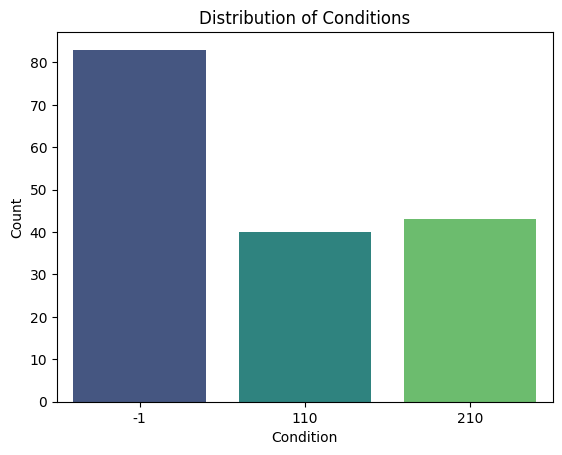

In [8]:
sns.countplot(x='Label', data=dataset, palette='viridis')
plt.title('Distribution of Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

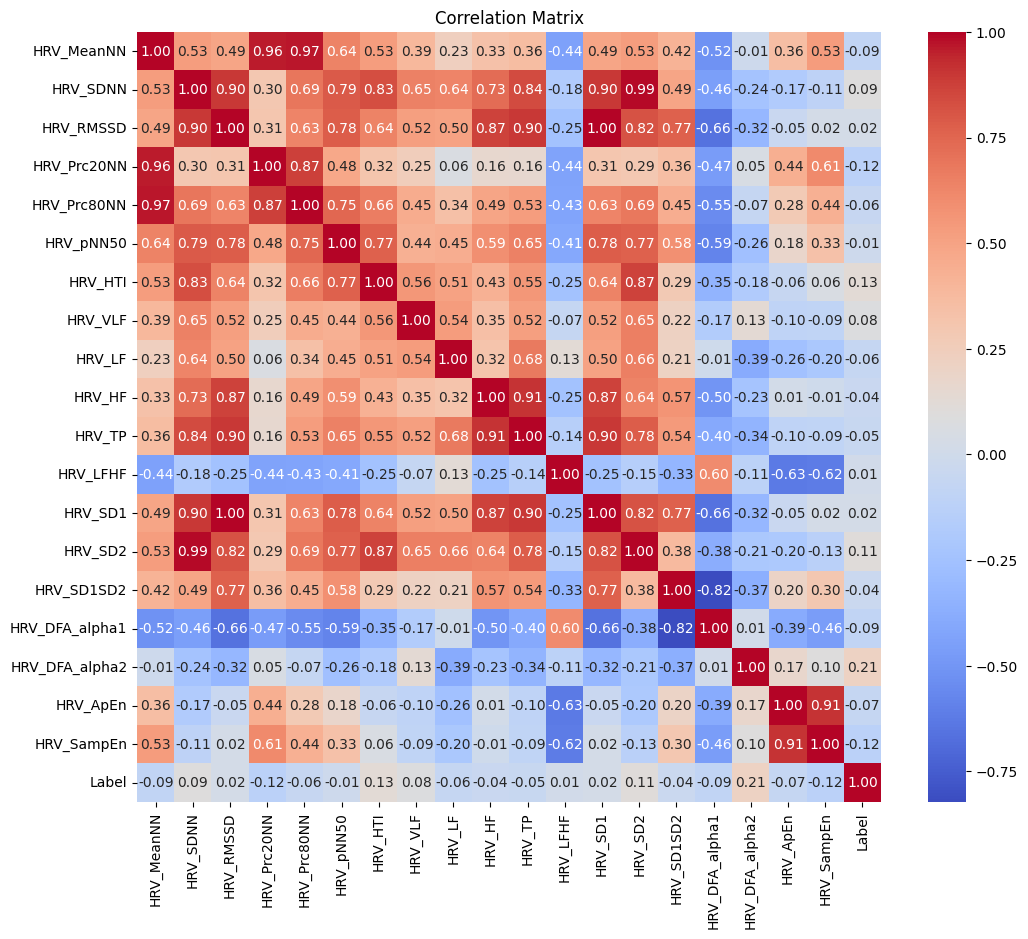

In [9]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

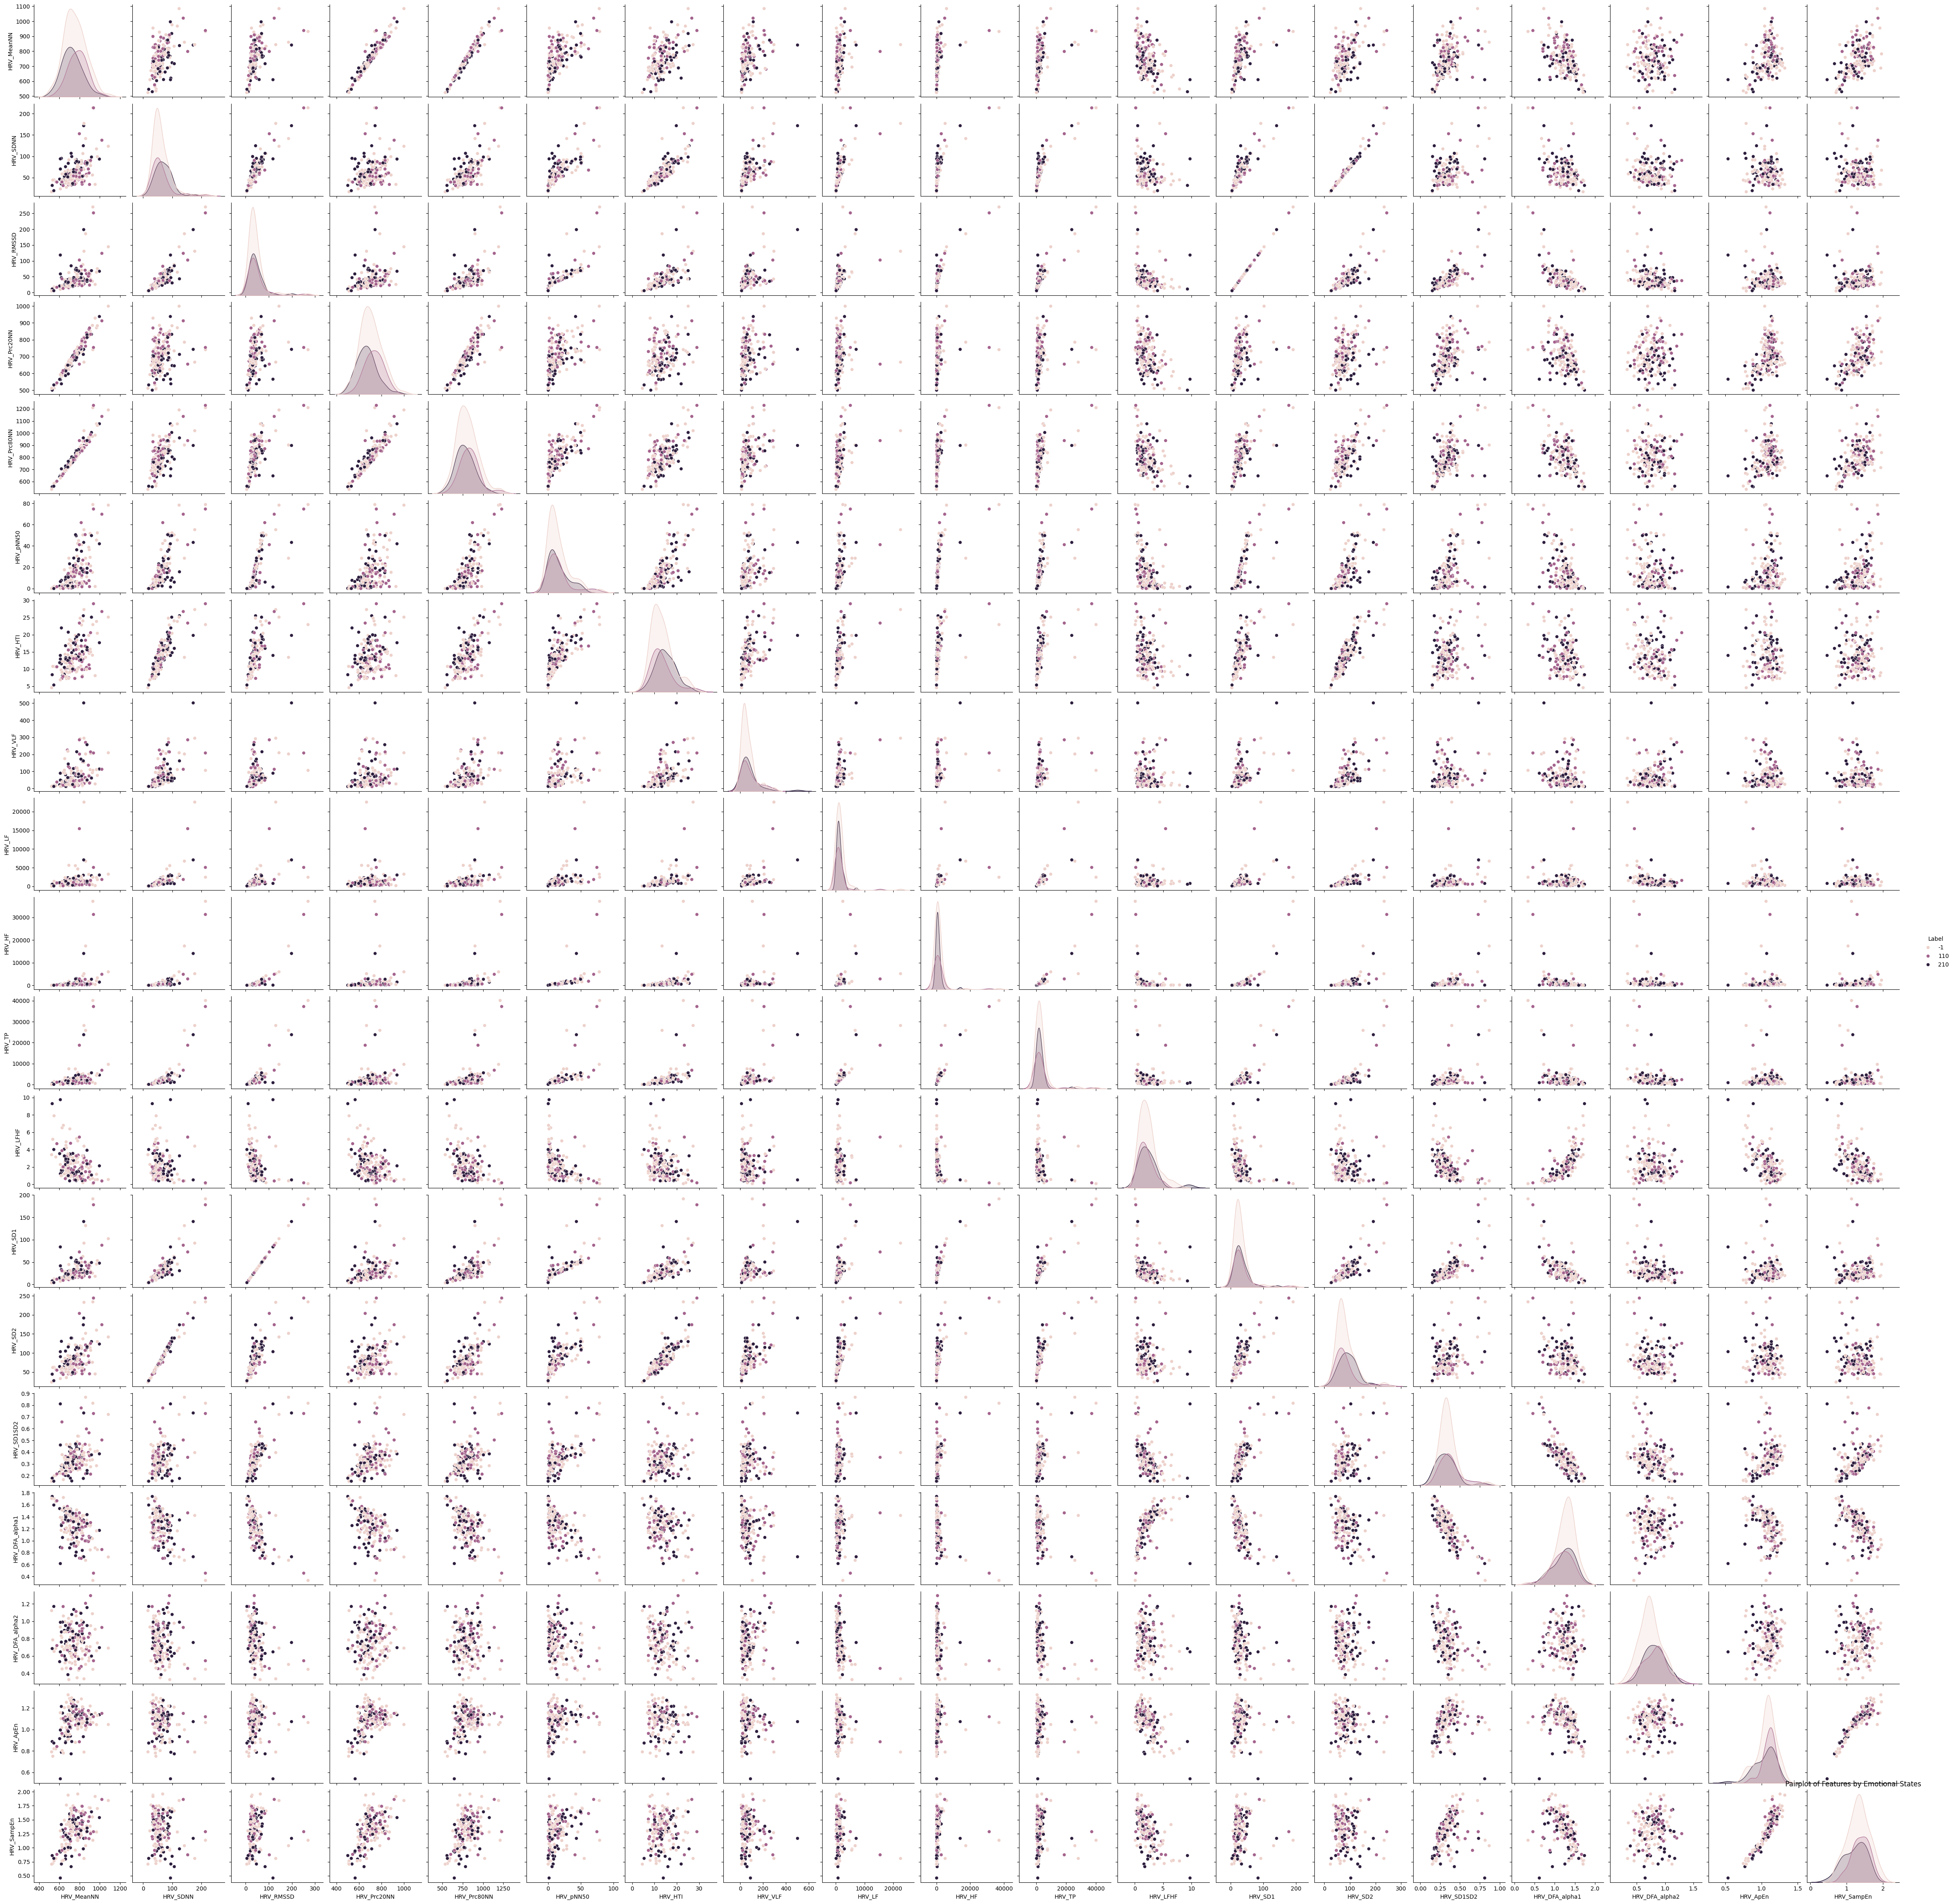

In [10]:
sns.pairplot(dataset, hue='Label')
plt.title('Pairplot of Features by Emotional States')
plt.show()

In [11]:
X = dataset.drop('Label', axis=1)
y = dataset['Label']

In [12]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [13]:
selector = SelectKBest(f_classif, k=4)
X_selected = selector.fit_transform(x_scaled, y)

In [14]:
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['HRV_MeanNN', 'HRV_Prc20NN', 'HRV_DFA_alpha2', 'HRV_SampEn'], dtype='object')


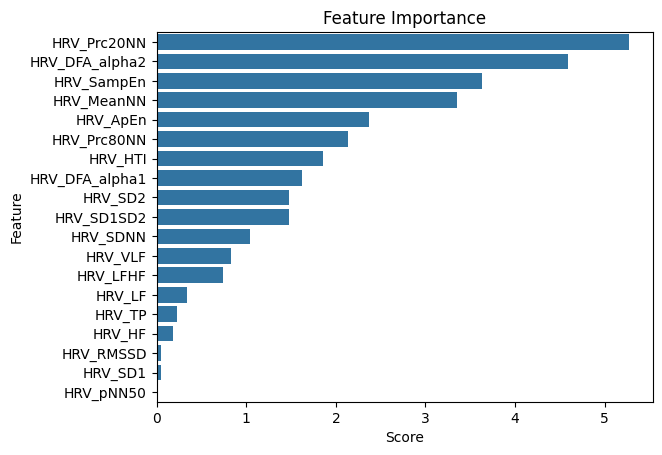

In [15]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance')
plt.show()

In [16]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_scaled)

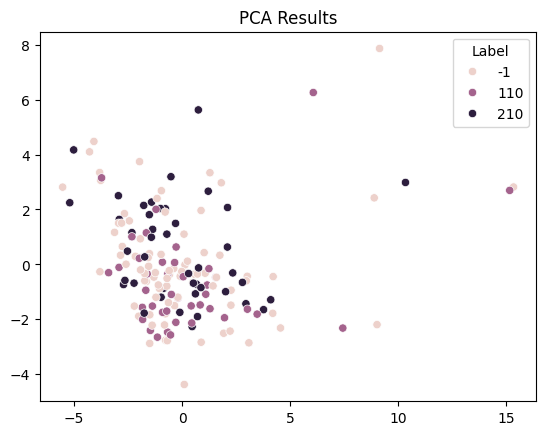

In [17]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA Results')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf_classifier.predict(X_test_scaled)

In [22]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          -1       0.69      0.69      0.69        29
         110       0.45      0.56      0.50         9
         210       0.30      0.25      0.27        12

    accuracy                           0.56        50
   macro avg       0.48      0.50      0.49        50
weighted avg       0.55      0.56      0.56        50

Accuracy: 0.56


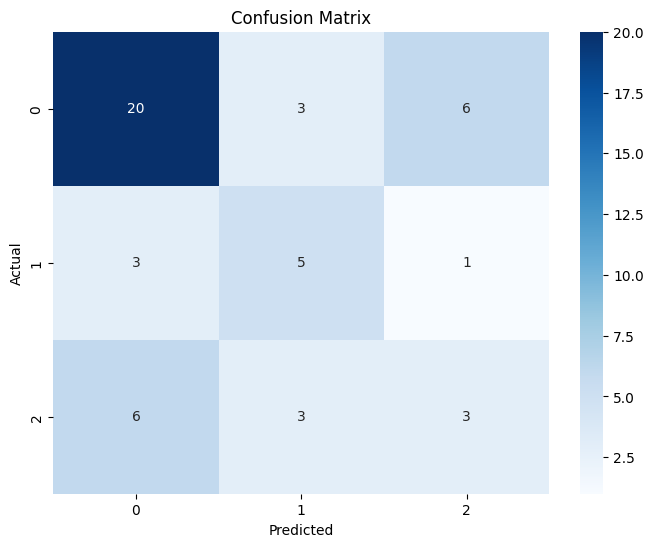

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
svm_classifier = SVC(kernel='linear', random_state=42)

In [25]:
cv_scores = cross_val_score(svm_classifier, x_scaled, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.55882353 0.48484848 0.57575758 0.54545455 0.51515152]
Mean Accuracy: 0.5360071301247772


In [26]:
svm_classifier.fit(x_scaled, y)

SVC(kernel='linear', random_state=42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=42)

In [28]:
y_pred_svm = svm_classifier.predict(X_test)

print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))


Classification Report (SVM):
               precision    recall  f1-score   support

          -1       0.71      1.00      0.83        10
         110       0.50      0.25      0.33         4
         210       1.00      0.33      0.50         3

    accuracy                           0.71        17
   macro avg       0.74      0.53      0.56        17
weighted avg       0.71      0.71      0.66        17

Accuracy (SVM): 0.7058823529411765


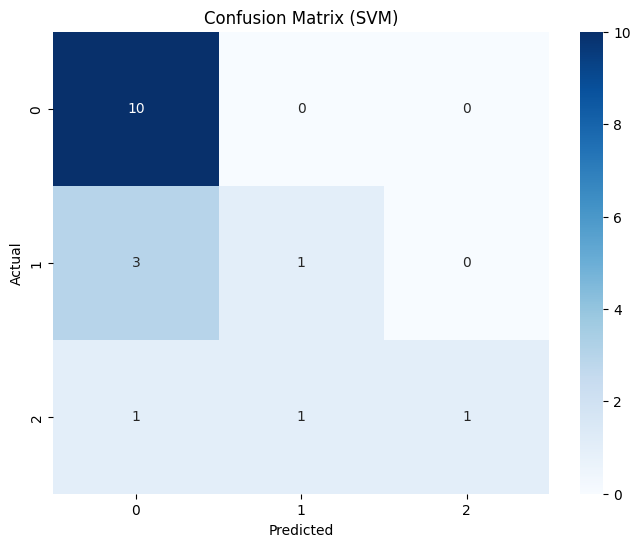

In [29]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()